<a href="https://colab.research.google.com/github/skywalker0803r/crypto/blob/main/%E5%9B%9E%E6%B8%AC%E5%88%86%E6%9E%90%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3(Leo_V2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization

In [2]:
#!pip install finlab_crypto
#!pip install finta

In [3]:
import numpy as np
import finlab_crypto
from finlab_crypto import Strategy

In [4]:
pair = 'BTCUSDT'
freq = '15m'
ohlcv = finlab_crypto.crawler.get_all_binance(pair,freq)
ohlcv

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4280.56,4261.48,4261.48,2.189061,1.502943e+12,9.333621e+03,9.0,0.489061,2.089105e+03,7958.417415
2017-08-17 04:15:00+00:00,4261.48,4270.41,4261.32,4261.45,9.119865,1.502944e+12,3.889113e+04,40.0,3.447113,1.470393e+04,7922.579933
2017-08-17 04:30:00+00:00,4280.00,4310.07,4267.99,4310.07,21.923552,1.502945e+12,9.408092e+04,58.0,20.421317,8.762098e+04,7912.494217
2017-08-17 04:45:00+00:00,4310.07,4313.62,4291.37,4308.83,13.948531,1.502946e+12,6.006047e+04,64.0,10.803012,4.653846e+04,7887.635513
2017-08-17 05:00:00+00:00,4308.83,4328.69,4304.31,4304.31,5.101153,1.502947e+12,2.200653e+04,44.0,3.496635,1.509378e+04,7865.654419
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25 01:30:00+00:00,22235.81,22281.18,22121.16,22202.67,2041.914360,1.658713e+12,4.534299e+07,54336.0,896.576880,1.991047e+07,0.000000
2022-07-25 01:45:00+00:00,22202.67,22223.65,22117.48,22205.42,1738.900160,1.658714e+12,3.856573e+07,46308.0,879.793810,1.951365e+07,0.000000
2022-07-25 02:00:00+00:00,22205.55,22211.42,22111.00,22197.91,1721.297680,1.658715e+12,3.814529e+07,45439.0,887.347090,1.966248e+07,0.000000


In [5]:
import finta
from finta import TA
ohlcv = ohlcv[['open','high','low','close','volume']]
ohlcv

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 04:00:00+00:00,4261.48,4280.56,4261.48,4261.48,2.189061
2017-08-17 04:15:00+00:00,4261.48,4270.41,4261.32,4261.45,9.119865
2017-08-17 04:30:00+00:00,4280.00,4310.07,4267.99,4310.07,21.923552
2017-08-17 04:45:00+00:00,4310.07,4313.62,4291.37,4308.83,13.948531
2017-08-17 05:00:00+00:00,4308.83,4328.69,4304.31,4304.31,5.101153
...,...,...,...,...,...
2022-07-25 01:30:00+00:00,22235.81,22281.18,22121.16,22202.67,2041.914360
2022-07-25 01:45:00+00:00,22202.67,22223.65,22117.48,22205.42,1738.900160
2022-07-25 02:00:00+00:00,22205.55,22211.42,22111.00,22197.91,1721.297680


# KD

In [6]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['K'] = TA.STOCH(ohlcv,period=9)
df['D'] = TA.STOCHD(ohlcv,period=3,stoch_period=9)
df.tail()

,K,D
timestamp,,
2022-07-25 01:30:00+00:00,12.767857,10.054752
2022-07-25 01:45:00+00:00,15.587777,11.005607
2022-07-25 02:00:00+00:00,15.659459,14.671698
2022-07-25 02:15:00+00:00,10.274993,13.840743
2022-07-25 02:30:00+00:00,2.977770,9.637408


# STOCHRSI

In [7]:
df['STOCHRSI'] = TA.STOCHRSI(ohlcv,rsi_period=14,stoch_period=14)
df.tail()

,K,D,STOCHRSI
timestamp,,,
2022-07-25 01:30:00+00:00,12.767857,10.054752,0.416203
2022-07-25 01:45:00+00:00,15.587777,11.005607,0.395689
2022-07-25 02:00:00+00:00,15.659459,14.671698,0.367295
2022-07-25 02:15:00+00:00,10.274993,13.840743,0.352457
2022-07-25 02:30:00+00:00,2.977770,9.637408,0.334628


# MACD

In [8]:
#A bullish crossover occurs when the MACD turns up and crosses above the signal line.
#A bearish crossover occurs when the MACD turns down and crosses below the signal line.
TA.MACD(ohlcv,period_fast=6,period_slow=13)
df['MACD'] = TA.MACD(ohlcv,period_fast=6,period_slow=13)['MACD']
df['SIGNAL'] = TA.MACD(ohlcv,period_fast=6,period_slow=13)['SIGNAL']
df

,K,D,STOCHRSI,MACD,SIGNAL
timestamp,,,,,
2017-08-17 04:00:00+00:00,NaN,NaN,NaN,0.000000,0.000000
2017-08-17 04:15:00+00:00,NaN,NaN,NaN,-0.001346,-0.000748
2017-08-17 04:30:00+00:00,NaN,NaN,NaN,3.096176,1.268483
2017-08-17 04:45:00+00:00,NaN,NaN,NaN,4.070624,2.217718
2017-08-17 05:00:00+00:00,NaN,NaN,NaN,3.936561,2.729035
...,...,...,...,...,...
2022-07-25 01:30:00+00:00,12.767857,10.054752,0.416203,-134.963242,-91.812746
2022-07-25 01:45:00+00:00,15.587777,11.005607,0.395689,-131.884538,-99.827104
2022-07-25 02:00:00+00:00,15.659459,14.671698,0.367295,-125.689432,-104.999570


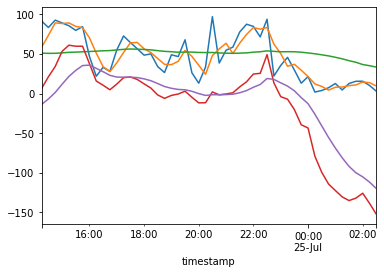

In [13]:
import matplotlib.pyplot as plt
N = 50
df['K'][-N:].plot()
df['D'][-N:].plot()
(df['STOCHRSI'][-N:]*100).plot()
df['MACD'][-N:].plot()
df['SIGNAL'][-N:].plot()

In [89]:
df['STOCHRSI'].describe()

count    172512.000000
mean          0.505992
std           0.094193
min           0.112846
25%           0.446976
50%           0.506846
75%           0.563979
max           0.898314
Name: STOCHRSI, dtype: float64

In [92]:
(df['STOCHRSI']>0.80).sum(),(df['STOCHRSI']<0.20).sum()

(234, 149)

In [60]:
entry1 = (df['K']>df['D'])&(df['K'].shift()<df['D'].shift())
entry2 = (df['MACD']>df['SIGNAL'])&(df['MACD'].shift()<df['SIGNAL'].shift())
entry = entry1&entry2
np.sum(entry)

2923

In [61]:
exits1 = (df['K']<df['D'])&(df['K'].shift()>df['D'].shift())
exits2 = (df['MACD']<df['SIGNAL'])&(df['MACD'].shift()>df['SIGNAL'].shift())
exits = exits1&exits2
np.sum(exits)

3080

In [62]:
df['close'] = ohlcv.loc[df.index,'close']
df['entry'] = entry
df['exits'] = exits
df

,K,D,STOCHRSI,MACD,SIGNAL,close,entry,exits
timestamp,,,,,,,,
2017-08-17 04:00:00+00:00,NaN,NaN,NaN,0.000000,0.000000,4261.48,False,False
2017-08-17 04:15:00+00:00,NaN,NaN,NaN,-0.001346,-0.000748,4261.45,False,False
2017-08-17 04:30:00+00:00,NaN,NaN,NaN,3.096176,1.268483,4310.07,False,False
2017-08-17 04:45:00+00:00,NaN,NaN,NaN,4.070624,2.217718,4308.83,False,False
2017-08-17 05:00:00+00:00,NaN,NaN,NaN,3.936561,2.729035,4304.31,False,False
...,...,...,...,...,...,...,...,...
2022-07-25 01:30:00+00:00,12.767857,10.054752,0.416203,-134.963242,-91.812746,22202.67,False,False
2022-07-25 01:45:00+00:00,15.587777,11.005607,0.395689,-131.884538,-99.827104,22205.42,False,False
2022-07-25 02:00:00+00:00,15.659459,14.671698,0.367295,-125.689432,-104.999570,22197.91,False,False


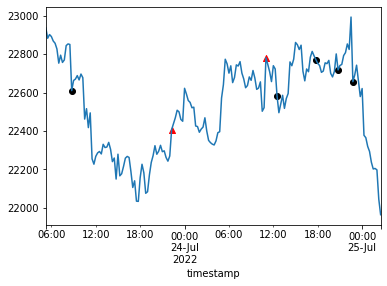

In [63]:
N = int(365/2)
C = df[-N:]
buy = C[C['entry']==True]['close']
sell = C[C['exits']==True]['close']
C['close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [64]:
C

,K,D,STOCHRSI,MACD,SIGNAL,close,entry,exits
timestamp,,,,,,,,
2022-07-23 05:15:00+00:00,76.653369,77.080028,0.534059,35.822292,22.044528,22936.98,False,False
2022-07-23 05:30:00+00:00,56.992278,74.589174,0.533227,27.868654,23.209353,22883.26,False,False
2022-07-23 05:45:00+00:00,64.019324,65.888324,0.531586,24.604440,23.488371,22902.46,False,False
2022-07-23 06:00:00+00:00,60.238627,60.416743,0.529195,20.125965,22.815889,22892.13,False,False
2022-07-23 06:15:00+00:00,51.765912,58.674621,0.528765,13.255431,20.903798,22868.98,False,False
...,...,...,...,...,...,...,...,...
2022-07-25 01:30:00+00:00,12.767857,10.054752,0.416203,-134.963242,-91.812746,22202.67,False,False
2022-07-25 01:45:00+00:00,15.587777,11.005607,0.395689,-131.884538,-99.827104,22205.42,False,False
2022-07-25 02:00:00+00:00,15.659459,14.671698,0.367295,-125.689432,-104.999570,22197.91,False,False


In [75]:
signal = []
win_lose = []
for i,idx in enumerate(C.index):
  s = np.argmax(C.loc[idx,['entry','exits']])
  點差 = df.iloc[i+1]['close'] - df.iloc[i]['close']
  if s == 0:#buy
    if 點差>0:#漲
      win_lose.append(True)
    else:
      win_lose.append(False)
    signal.append(1)#buy
  elif s == 1:#sell
    if 點差<0:#跌
      win_lose.append(True)
    else:
      win_lose.append(False)
    signal.append(-1)#sell
  else:
    signal.append(0)
np.mean(signal),len(signal),
勝率 = np.mean(win_lose)
print('勝率',勝率)

勝率 0.46153846153846156


In [88]:
a = (C['close'].shift()-C['close']).values*signal
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
失敗率 = 1 - 勝率
print(f'勝率{勝率}')
print(f'平均獲利{平均獲利}')
print(f'失敗率{失敗率}')
print(f'平均損失{平均損失}')
盈虧比 = (勝率*平均獲利)/(失敗率*平均損失*-1)
print(f'盈虧比{盈虧比}')

勝率0.46153846153846156
平均獲利24.057513812154777
失敗率0.5384615384615384
平均損失-27.75077348066306
盈虧比0.7430685180387051
